#### Import of Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [3]:
df1 = pd.read_csv('datasets/shuttle.csv')
df = df1.head(800)

In [4]:
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,Class
0,55,0,92,0,0,26,36,92,56,4
1,53,0,82,0,52,-5,29,30,2,1
2,37,0,76,0,28,18,40,48,8,1
3,37,0,79,0,34,-26,43,46,2,1
4,85,0,88,-4,6,1,3,83,80,5


In [5]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      800 non-null    int64
 1   A2      800 non-null    int64
 2   A3      800 non-null    int64
 3   A4      800 non-null    int64
 4   A5      800 non-null    int64
 5   A6      800 non-null    int64
 6   A7      800 non-null    int64
 7   A8      800 non-null    int64
 8   A9      800 non-null    int64
 9   Class   800 non-null    int64
dtypes: int64(10)
memory usage: 62.6 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

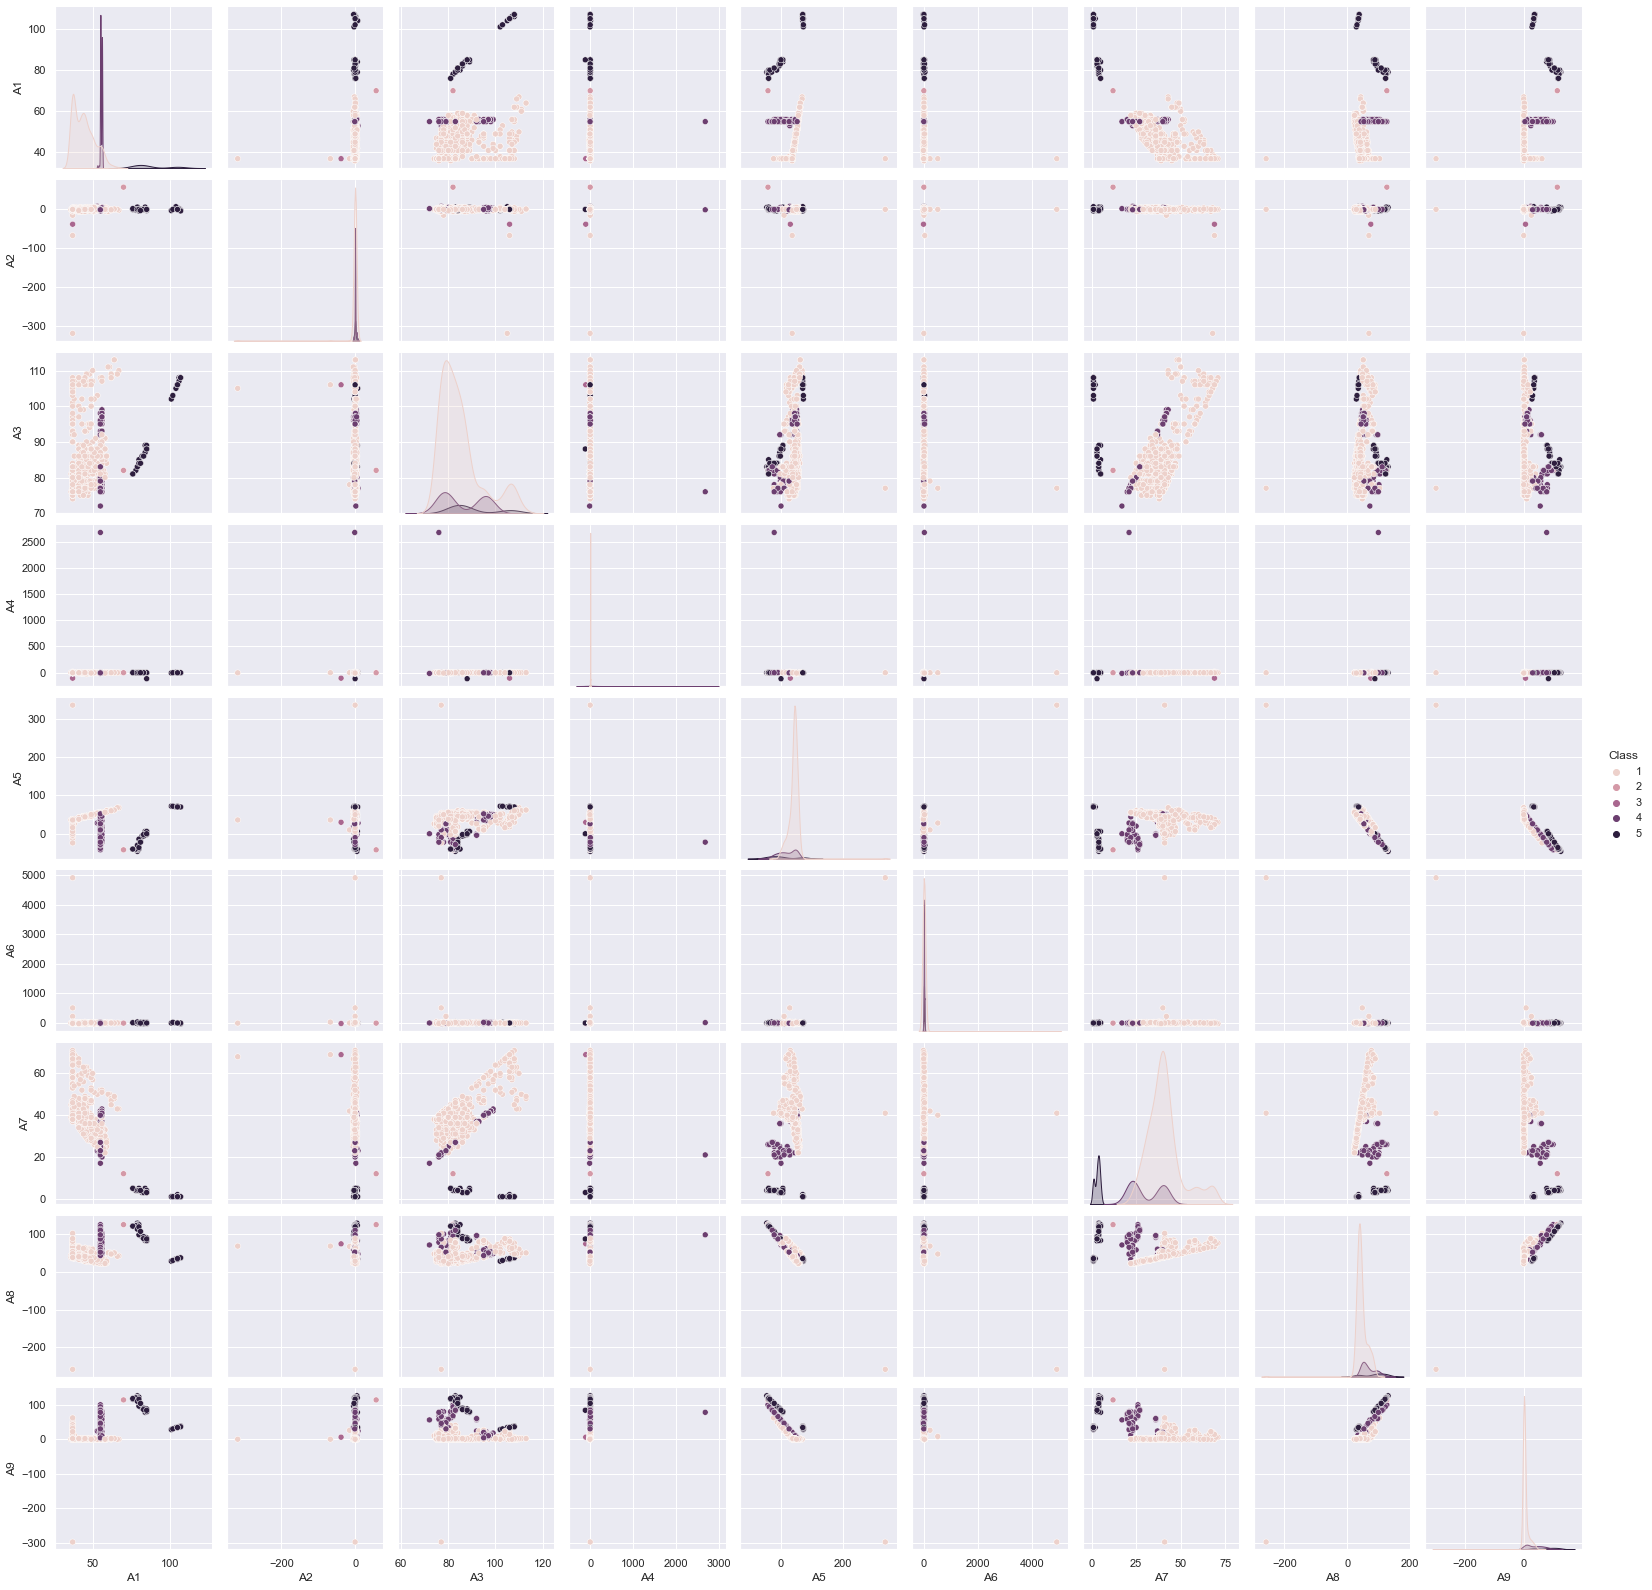

In [6]:
sns.pairplot(df, hue='Class')
plt.show()

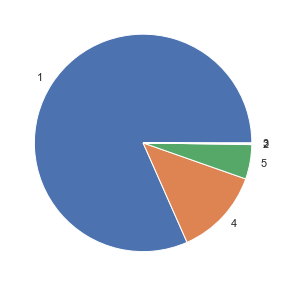

In [7]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [8]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1,800.0,47.89500,11.954711,36.0,38.0,45.0,55.0,107.0
A2,800.0,-0.44125,11.887207,-318.0,0.0,0.0,0.0,57.0
A3,800.0,85.46000,9.120849,72.0,78.0,83.0,88.0,113.0
A4,800.0,2.92625,94.744467,-114.0,0.0,0.0,0.0,2674.0
A5,800.0,35.36000,23.750484,-46.0,28.0,42.0,46.0,336.0
A6,800.0,7.32250,175.053444,-34.0,-4.0,0.0,5.0,4910.0
A7,800.0,37.55750,12.894069,1.0,32.0,39.0,42.0,71.0
A8,800.0,50.17500,23.627838,-258.0,37.0,43.0,60.0,130.0
A9,800.0,12.78250,27.232328,-298.0,0.0,2.0,12.5,126.0


#### Standardize the Data

In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1,800.0,-2.708944e-16,1.000626,-0.995628,-0.828225,-0.242315,0.594698,4.947169
A2,800.0,2.220446e-18,1.000626,-26.731041,0.037143,0.037143,0.037143,4.835214
A3,800.0,6.783463e-16,1.000626,-1.476663,-0.818418,-0.269880,0.278657,3.021345
A4,800.0,0.000000e+00,1.000626,-1.234894,-0.030905,-0.030905,-0.030905,28.210035
A5,800.0,2.220446e-17,1.000626,-3.427757,-0.310082,0.279748,0.448271,12.666187
A6,800.0,2.220446e-18,1.000626,-0.236204,-0.064721,-0.041856,-0.013276,28.024268
A7,800.0,1.909584e-16,1.000626,-2.836992,-0.431282,0.111943,0.344754,2.595257
A8,800.0,1.110223e-16,1.000626,-13.051037,-0.557954,-0.303857,0.416083,3.380544
A9,800.0,-2.220446e-18,1.000626,-11.419403,-0.469681,-0.396193,-0.010380,4.160068


#### Observations and Variables

In [10]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

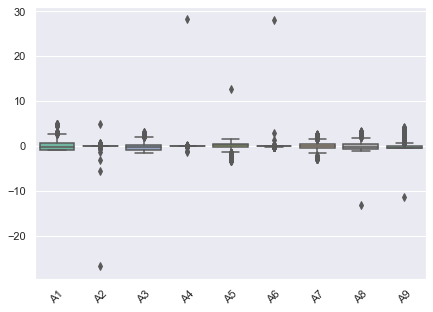

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

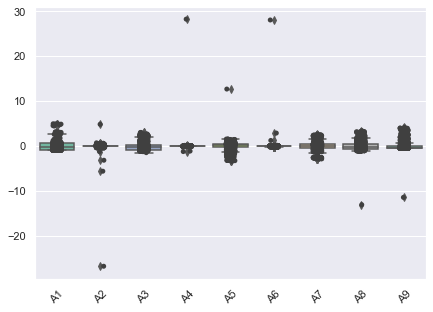

In [12]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

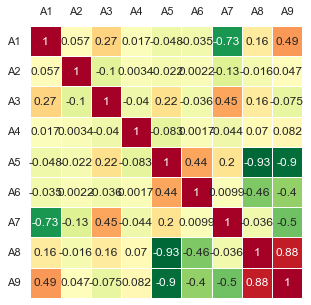

In [13]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [14]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [15]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.571666,-0.569104,0.727765,0.011181,-0.153156,1.132312
1,0.661883,1.127389,-0.047366,-0.056880,0.163974,-0.641417
2,0.219325,-0.328695,-1.365138,-0.086934,0.209479,0.110172
3,0.511424,-0.566649,-1.051054,-0.113840,0.072571,-0.180016
4,-4.081897,2.637719,1.591538,-0.019910,0.370735,0.442197
...,...,...,...,...,...,...
795,-0.490965,-3.164872,1.224356,0.000611,-0.890922,1.065380
796,0.683846,-0.148635,-0.029566,-0.029211,-0.095291,-0.212156
797,-1.093353,1.093897,-0.359057,-0.071851,0.423719,-0.076770
798,0.558780,-0.165333,-0.740489,-0.018936,0.326644,-0.319700


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (36.7% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

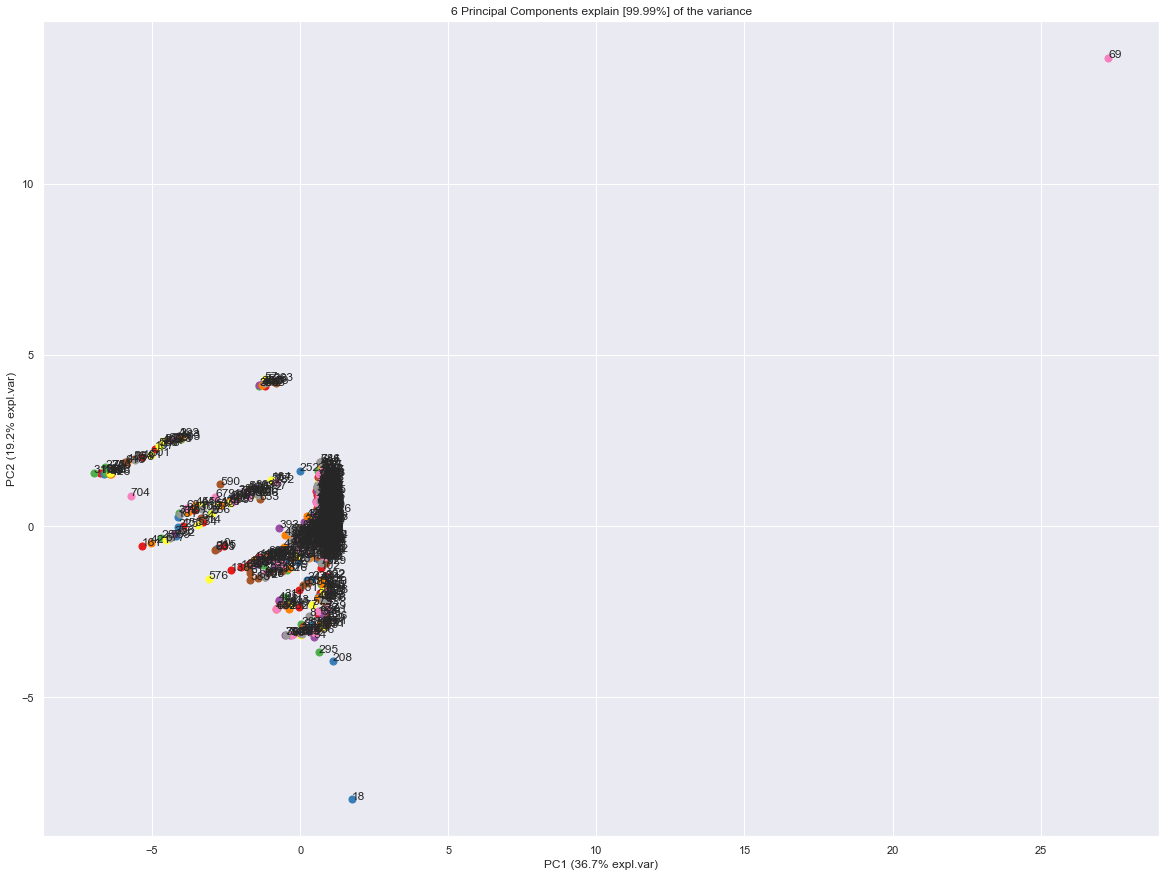

In [16]:
model.scatter(label=True, legend=False)

Eigenvectors

In [17]:
A = out['loadings'].T

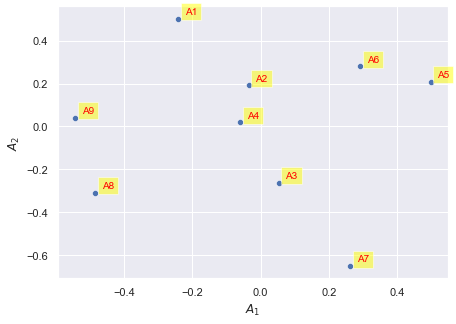

In [18]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

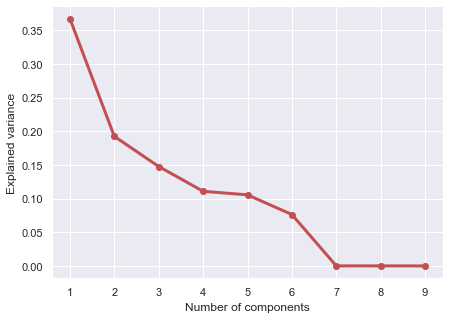

In [19]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

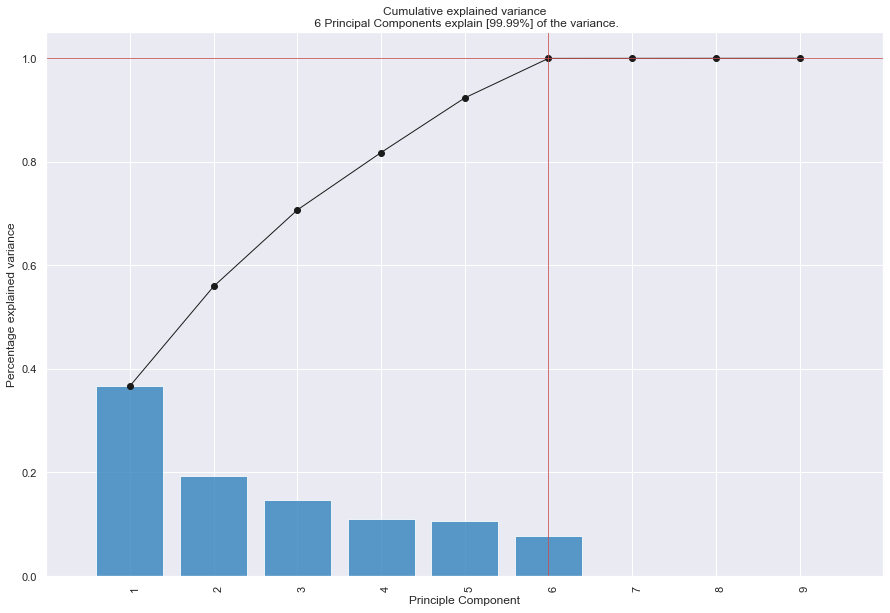

<Figure size 504x360 with 0 Axes>

In [20]:
model.plot();